In [1]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint



In [19]:

def plot_lossv_from_model_logs(filepath, from_epoch=0):

    with open(filepath, 'r') as file:
        model_stats = json.load(file)

    model_validations = {}

    for model in model_stats.keys():
        model_validations[model] = model_stats[model]['loss_vector']

    plt.figure(figsize=(12, 10))

    pprint(len(model_stats.keys()))
    for model in model_validations.keys():
        lossv = model_validations[model][from_epoch:]
        plt.plot(np.arange(1, len(lossv) + 1), lossv, label=model)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('loss vs epoch')


9


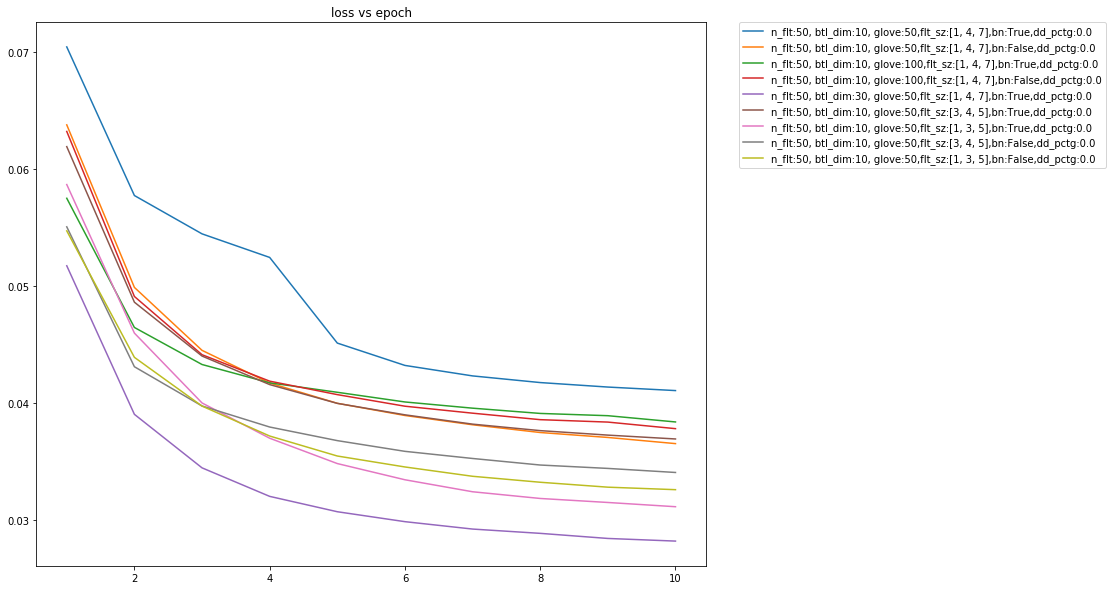

In [20]:
plot_lossv_from_model_logs('./model_stats.json')

9


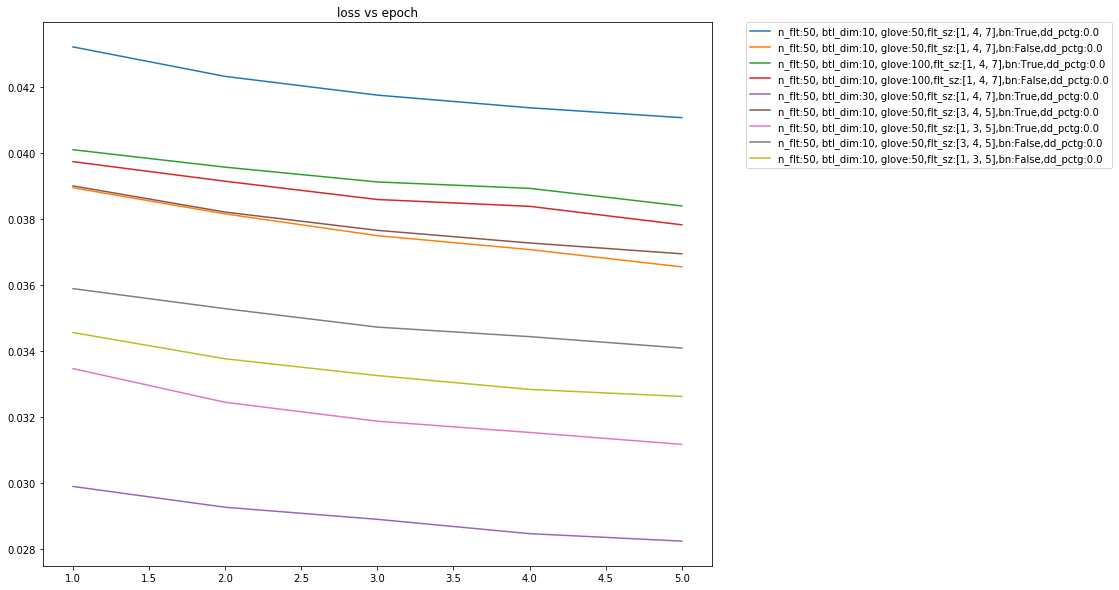

In [21]:
plot_lossv_from_model_logs('./model_stats.json', from_epoch =5 )